# Tryout

The goal of this notebook is to get familiar with model training. What should I do with categorical variables? What model to choose?

In [1]:
pip install category_encoders


Note: you may need to restart the kernel to use updated packages.


# Some extra data preparation

From the EDA I learned that seasons had correlations with the target variable. To help the model, I'm including a feature called season.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df = pd.read_csv('met_regions.csv')
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'], format='%Y-%m-%d')
def bepaal_seizoen(datum):
    jaar = datum.year
    lente_start = pd.Timestamp(f'{jaar}-03-21')
    zomer_start = pd.Timestamp(f'{jaar}-06-21')
    herfst_start = pd.Timestamp(f'{jaar}-09-23')
    winter_start = pd.Timestamp(f'{jaar}-12-21')
    
    if lente_start <= datum < zomer_start:
        return 'Lente'
    elif zomer_start <= datum < herfst_start:
        return 'Zomer'
    elif herfst_start <= datum < winter_start:
        return 'Herfst'
    else:
        return 'Winter'


df['Seizoen'] = df['FL_DATE'].apply(bepaal_seizoen)


df.to_csv('met_seizoen.csv', index=False)





df.head()











,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT,Month,DayOfWeek,DELAY_CATEGORY,DISTANCE_CATEGORY,iata_code,name,Origin_Latitude,Origin_Longitude,Airport_Region,Seizoen
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",1155,1151.0,-4.0,19.0,1210.0,1443.0,4.0,1501,1447.0,-14.0,0.0,NaN,0.0,186.0,176.0,153.0,1065.0,0.0,0.0,0.0,0.0,0.0,1,2,Op tijd,1000-2000,FLL,Fort Lauderdale Hollywood International Airport,26.072599,-80.152702,South-East,Winter
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",2120,2114.0,-6.0,9.0,2123.0,2232.0,38.0,2315,2310.0,-5.0,0.0,NaN,0.0,235.0,236.0,189.0,1399.0,0.0,0.0,0.0,0.0,0.0,11,5,Op tijd,1000-2000,MSP,Minneapolis–Saint Paul International Airport /...,44.880081,-93.221741,North-East,Herfst
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",954,1000.0,6.0,20.0,1020.0,1247.0,5.0,1252,1252.0,0.0,0.0,NaN,0.0,118.0,112.0,87.0,680.0,0.0,0.0,0.0,0.0,0.0,7,4,Tot 10 minuten,0-1000,DEN,Denver International Airport,39.861698,-104.672997,North-West,Zomer
3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",1609,1608.0,-1.0,27.0,1635.0,1844.0,9.0,1829,1853.0,24.0,0.0,NaN,0.0,260.0,285.0,249.0,1589.0,0.0,0.0,24.0,0.0,0.0,3,0,Tot 30 minuten,1000-2000,MSP,Minneapolis–Saint Paul International Airport /...,44.880081,-93.221741,North-East,Winter
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",1840,1838.0,-2.0,15.0,1853.0,2026.0,14.0,2041,2040.0,-1.0,0.0,NaN,0.0,181.0,182.0,153.0,985.0,0.0,0.0,0.0,0.0,0.0,2,6,Op tijd,0-1000,MCO,Orlando International Airport,28.429399,-81.308998,South-East,Winter


In [3]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


# Linear regression and Random Forest Regressor

To get myself familiar with model training, I'm beginning with linear regression and a random forest regressor. I know the linear regression would not work at all, because there is absolutey no linear correlation, but I want to learn how model training works. For encoding my categorical variables, I chose One Hot encoding. This is the most accurate one for model training.

In [4]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
df2 = df.sample(n=10000, random_state=42)

kolommen = ['ORIGIN', 'Airport_Region', 'Seizoen', 'ARR_DELAY', 'AIRLINE_CODE', 'CRS_DEP_TIME', 'CRS_ARR_TIME', 'CRS_ELAPSED_TIME', 'DISTANCE']
df2 = df2[kolommen]
df2 = pd.get_dummies(df2, columns=['ORIGIN', 'Seizoen', 'Airport_Region', 'AIRLINE_CODE'], drop_first=False)


X = df2.drop('ARR_DELAY', axis=1)
y = df2['ARR_DELAY']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


rf_model = RandomForestRegressor(random_state=42)
lr_model = LinearRegression()


rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_preds)
rf_r2 = r2_score(y_test, rf_preds)


lr_model.fit(X_train_scaled, y_train)
lr_preds = lr_model.predict(X_test_scaled)
lr_mse = mean_squared_error(y_test, lr_preds)
lr_r2 = r2_score(y_test, lr_preds)


print("Random Forest Regressor:")
print(f"MSE: {rf_mse:.2f}, R2: {rf_r2:.2f}\n")

print("Linear Regression:")
print(f"MSE: {lr_mse:.2f}, R2: {lr_r2:.2f}")




Random Forest Regressor:
MSE: 4087.32, R2: -0.06

Linear Regression:
MSE: 3843141431181446724601249792.00, R2: -997402304442724358553600.00


The results can be considered very bad. For the random forest the mean squared error is about 4100, this means the model is off by about 64 minutes. A negative r^2 score suggests that there is no predictive power in this model. The multiple regression is very bad. I talked to Bas and Hans about these outomes. Bas had suggested me that I should start with a support vector machine. This type of machine learning models can find complex relationships easier. So I'm going to do the first tryout with support vector machines. 

# Support vector

I'm also going to use a sample of 10,000. A bigger sample comes with great processing times, which takes too much time for me.

In [9]:
df3 = df.sample(n=10000, random_state=42)
from sklearn.svm import SVR



kolommen = ['ORIGIN', 'Airport_Region', 'Seizoen', 'ARR_DELAY', 'AIRLINE_CODE', 'CRS_DEP_TIME', 'CRS_ARR_TIME', 'CRS_ELAPSED_TIME', 'DISTANCE']
df3 = df3[kolommen]
df3 = pd.get_dummies(df3, columns=['ORIGIN', 'Seizoen', 'Airport_Region', 'AIRLINE_CODE'], drop_first=False)
target = 'ARR_DELAY'
X = df3.drop(columns=[target])  
y = df3[target]
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)  
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)) 


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)


svr = SVR(kernel='linear', C=0.1, gamma='scale')

svr.fit(X_train, y_train.ravel()) 


y_pred_scaled = svr.predict(X_test)


y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))
y_test_original = scaler_y.inverse_transform(y_test.reshape(-1, 1))


mse = mean_squared_error(y_test_original, y_pred)
r2 = r2_score(y_test_original, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 3970.667795521806
R^2 Score: -0.030498949972934453


### Results
The results here are als disappointing. By studying a paper I came to know that they could predict, using SVR, a mean error of 15 minutes. But they never mentioned the r squared score. I also read that they removed outliers, which in this case of arrival delays, is something you just shouldn't do, because outliers are important within this context, because it happens a lot. I tried using kernel functions, the image below shows the results. <br>
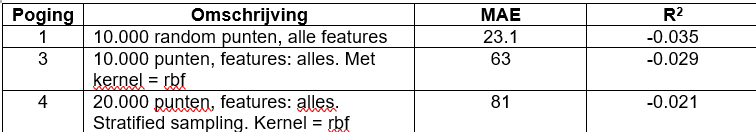 <br>
The kernel functions didn't allow for any improvements, so I'm not going to use it during training 


### How to Move on?
After talking to Jacco, I'm going to move on with stratified sampling before training a SVR. The this stratified sampling allows for every feature to be represented within the sample, to improve accuracy.